# RAG Data Analytics & Visualization Notebook

This notebook provides an end-to-end workflow for analyzing and visualizing data extracted by the Retrieval-Augmented Generation (RAG) pipeline. It is intended for data analytics and visualization only. All extraction, ingestion, and deployment logic remains in the original Python files.

In [1]:
# --- Imports & Setup ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
import json
import os

# Set up plotting
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## 1. Data Loading
Connect to MongoDB or load exported data files.

In [2]:
# --- MongoDB Connection or Fallback ---
mongo_uri = 'mongodb://mongodb:27017/'  # Change if running locally
db_name = 'pdf_rag'

try:
    client = MongoClient(mongo_uri, serverSelectionTimeoutMS=5000)
    db = client[db_name]
    client.server_info()
    invoices = list(db.invoices.find())
    qa_pairs = list(db.qa_pairs.find())
    print(f"Loaded {len(invoices)} invoices and {len(qa_pairs)} QA pairs from MongoDB.")
except Exception as e:
    print(f"MongoDB connection failed: {e}\nFalling back to local example data.")
    if os.path.exists("invoices.json"):
        with open("invoices.json") as f:
            invoices = json.load(f)
    else:
        invoices = [{"customer_name": "Demo Customer", "amount": 100.0, "date": "2024-01-01"}]
    if os.path.exists("qa_pairs.json"):
        with open("qa_pairs.json") as f:
            qa_pairs = json.load(f)
    else:
        qa_pairs = [{"question": "What is the amount?", "answer": "$100", "sources": ["Demo Source"]}]

# Convert to DataFrame for analysis
invoices_df = pd.DataFrame(invoices)
qa_pairs_df = pd.DataFrame(qa_pairs)

print(f'Loaded {len(invoices_df)} invoices and {len(qa_pairs_df)} QA pairs.')

MongoDB connection failed: mongodb:27017: [Errno 8] nodename nor servname provided, or not known (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 5.0s, Topology Description: <TopologyDescription id: 680bde00a3afc0b3857a797b, topology_type: Unknown, servers: [<ServerDescription ('mongodb', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('mongodb:27017: [Errno 8] nodename nor servname provided, or not known (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>
Falling back to local example data.
Loaded 1 invoices and 1 QA pairs.


## 2. Data Exploration
Preview the data and basic statistics.

In [3]:
# --- Preview Data ---
invoices_df.head()

,customer_name,amount,date
0,Demo Customer,100.0,2024-01-01


In [4]:
# --- Summary Statistics ---
invoices_df.describe(include='all')

,customer_name,amount,date
count,1,1.0,1
unique,1,NaN,1
top,Demo Customer,NaN,2024-01-01
freq,1,NaN,1
mean,NaN,100.0,NaN
std,NaN,NaN,NaN
min,NaN,100.0,NaN
25%,NaN,100.0,NaN
50%,NaN,100.0,NaN
75%,NaN,100.0,NaN


## 3. Analytics
Analyze extracted fields (amounts, dates, customer names, etc.).

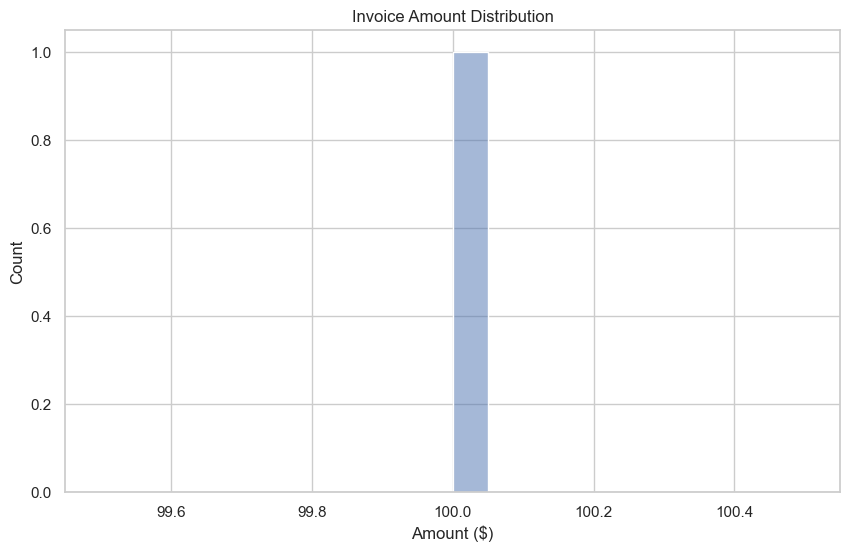

In [5]:
# --- Example: Invoice Amount Distribution ---
if 'amount' in invoices_df.columns:
    invoices_df['amount'] = invoices_df['amount'].replace('[$,]', '', regex=True).astype(float)
    sns.histplot(invoices_df['amount'], bins=20, kde=True)
    plt.title('Invoice Amount Distribution')
    plt.xlabel('Amount ($)')
    plt.ylabel('Count')
    plt.show()


## 4. Time Series or Trends
Visualize trends over time (e.g., invoice counts or totals by month).

/var/folders/3d/qt049k011xq8vwck8zlbcq7c0000gn/T/ipykernel_36110/3083554176.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  invoices_df.set_index('date').resample('M').size().plot(kind='bar')


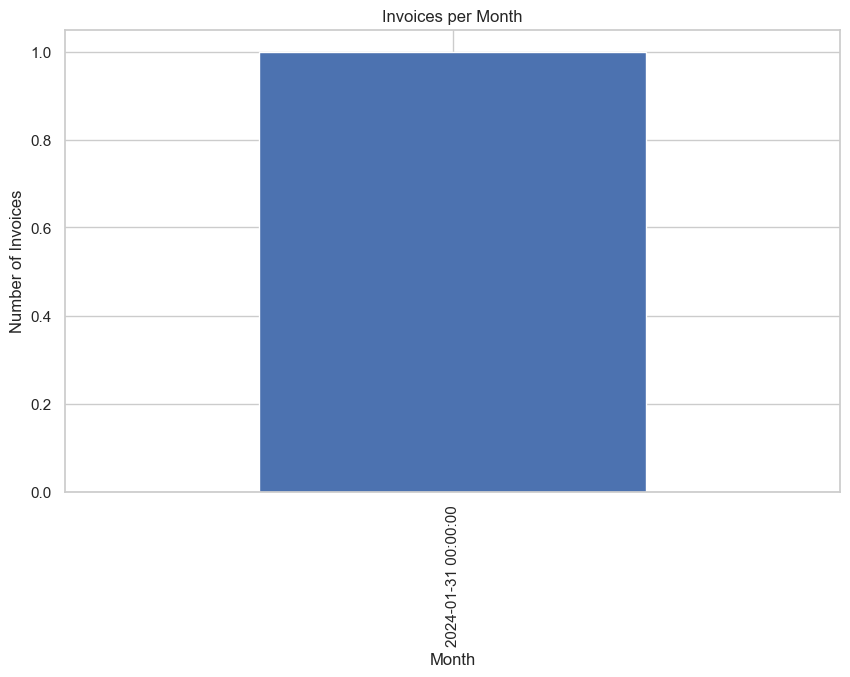

In [6]:
# --- Example: Invoices Over Time ---
if 'date' in invoices_df.columns:
    invoices_df['date'] = pd.to_datetime(invoices_df['date'], errors='coerce')
    invoices_df.set_index('date').resample('M').size().plot(kind='bar')
    plt.title('Invoices per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Invoices')
    plt.show()


## 5. QA Pairs Analytics
Analyze and visualize QA pairs if relevant.

In [7]:
# --- Preview QA Pairs ---
qa_pairs_df.head()

,question,answer,sources
0,What is the amount?,$100,[Demo Source]


## 6. Custom Visualizations & Analysis
Add more analytics or visualizations as needed.